In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# Modelado
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings


## Paso 1: Planteamiento del problema y recopilación de datos

>Queremos saber que tipo de cliente contratará o no un depósito a largo plazo.

## Paso 2: Exploración y limpieza de datos

In [91]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=";")

In [92]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Paso 3: Análisis Descriptivo

### Definición de cada variable

>`age` (numérico) --- Edad del cliente  
>`job` (categórico) --- Tipo de trabajo  
>`marital` (categórico) --- Estado civil  
>`education` (categórico) --- Nivel de educación  
>`default` (categórico) --- ¿Tiene crédito actualmente?  
>`housing` (categórico) --- ¿Tiene un préstamo de vivienda?  
>`loan` (categórico) --- ¿Tiene un préstamo personal?  
>`contact` (categórico) --- Tipo de comunicación de contacto  
>`month` (categórico) --- Último mes en el que se le ha contactado  
>`day_of_week` (categórico) --- Último día en el que se le ha contactado  
>`duration` (numérico) --- Duración del contacto previo en segundos  
>`campaign` (numérico) --- Número de contactos realizados durante esta campaña al cliente  
>`pdays` (numérico) --- Número de días que transcurrieron desde la última campaña hasta que contactado (numérico)   
>`previous` (numérico) --- Número de contactos realizados durante la campaña anterior al cliente  
>`poutcome` (categórico) --- Resultado de la campaña de marketing anterior  
>`emp.var.rate` (numérico) --- Tasa de variación del empleo. Indicador trimestral  
>`cons.price.idx` (numérico) --- Índice de precios al consumidor. Indicador mensual  
>`cons.conf.idx` (numérico) --- Índice de confianza del consumidor. Indicador mensual  
>`euribor3m` (numérico) --- Tasa EURIBOR 3 meses. Indicador diario  
>`nr.employed` (numérico) --- Número de empleados. Indicador trimestral  
>`TARGET` (categórico) --- El cliente contrata un depósito a largo plazo o no 

In [93]:
df.shape

(41188, 21)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Observaciones

> Podemos ver que tenemos un conjunto de datos de 41188 filas, 21 columnas. en el cual no encontramos valores nulos

## Paso 4: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

In [96]:
df.duplicated().sum()

np.int64(12)

>Cada fila intenta representar a un usuario, aunque no tenemos id para certificar las probabilidades, que tengan las mismas condiciones son muy bajas, procederemos a borrar los 12 duplicados

In [97]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

np.int64(0)

### Limpieza de datos: Eliminar información irrelevante

> ### Conclusión:
>
> Aunque hay datos que dudo si sean importante, prefiero analizarlas para descartarlas ya que en todas veo cierta duda que debo revisar antes de eliminar.

## Paso 5: Análisis de Variables

### Codificamos una variable categórica con factorize

In [98]:
y_numerical = pd.factorize(df['y'])
y_numerical


(array([0, 0, 0, ..., 0, 1, 0], shape=(41176,)),
 Index(['no', 'yes'], dtype='object'))

In [99]:
df['y_numerical'] = pd.factorize(df['y'])[0]
df[['y', 'y_numerical']]

,y,y_numerical
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
41171,yes,1
41172,no,0
41173,no,0
41174,yes,1


In [100]:
y_numerical_rules = {row['y']: row['y_numerical'] for _, row in df.iterrows()}
with open('../models/y_numerical_rules.json', 'w') as file:
    json.dump(y_numerical_rules, file)
    df.drop(["y"], axis=1, inplace=True)
y_numerical_rules

{'no': 0, 'yes': 1}

### Análisis de Variables Univariante Categóricas


In [101]:
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

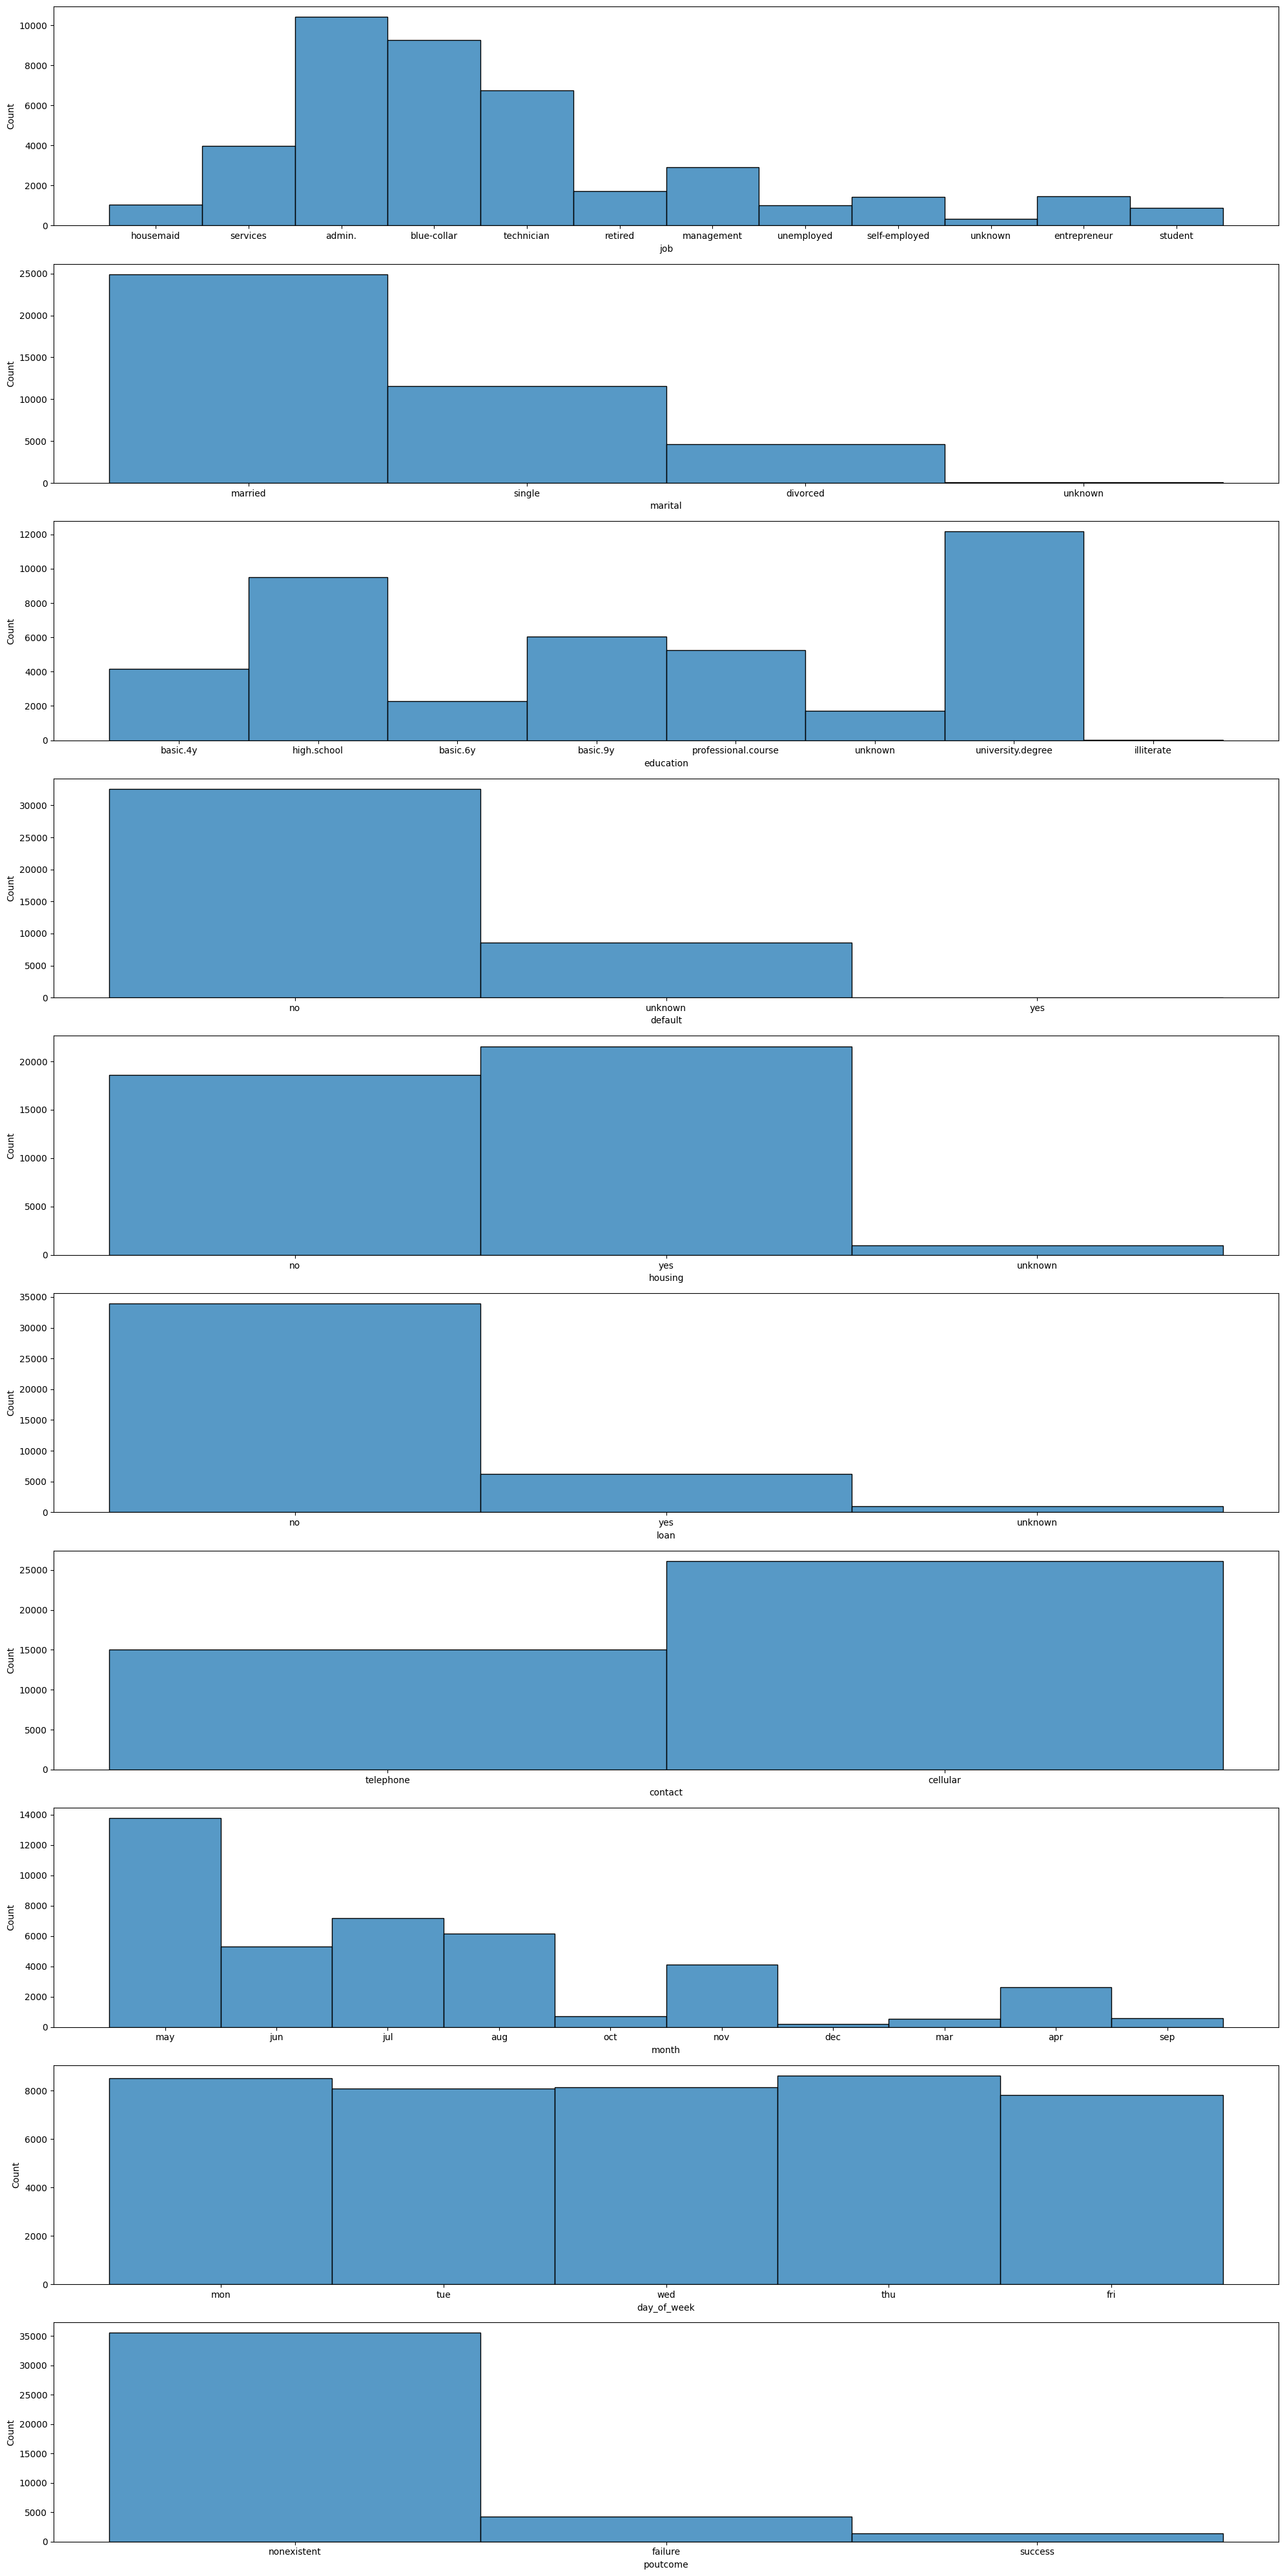

In [102]:
fig, axis = plt.subplots(len(categorical_variables), 1, figsize=(20, 4*len(categorical_variables)))

row = 0
for var in categorical_variables:
    sns.histplot(ax=axis[row], data=df, x=var)
    row += 1

plt.tight_layout()
plt.show()


### Análisis de Variables Univariante Numéricas

In [103]:
num_variables = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_variables

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y_numerical']

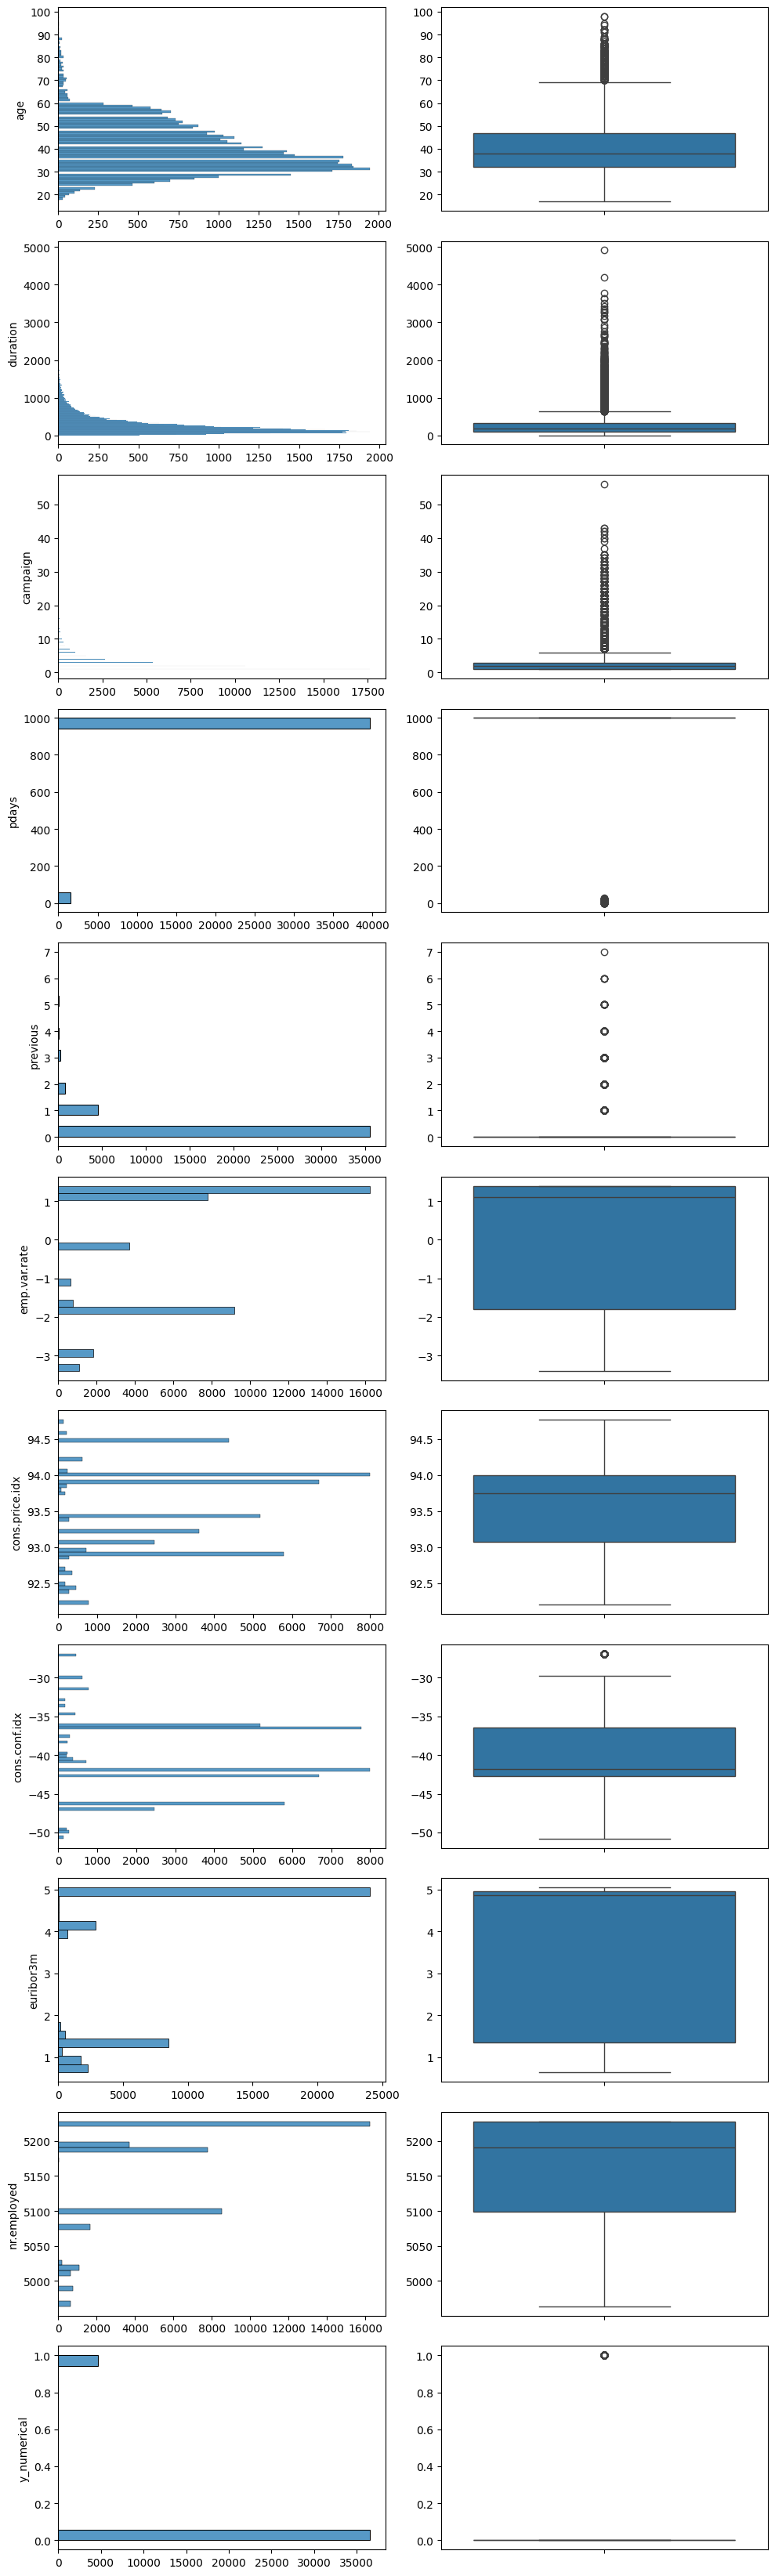

In [104]:
fig, axis = plt.subplots(len(num_variables), 2, figsize=(10, 3*len(num_variables)))

for i, var in enumerate(num_variables):
    sns.histplot(ax=axis[i, 0], data=df, y=var).set(xlabel=None)
    sns.boxplot(ax=axis[i, 1], data=df, y=var).set(ylabel=None)


plt.tight_layout()
plt.show()

### Observaciones

#### Univariante categorica

> Tenemos 10 variables categoricas, con ellas podemos ver que los datos dicen lo siguiente.


>`Job` La mayoria de los trabajos son admin, blue-collar, y technecian  
>`marital` una gran parte es de personas casadas.  
>`education` hay una inclinacion por egresados de la universidad, pero el resto de datos no deja a ninguno por detras.  
>`default` La mayoria los datos se inclinan por "no", por "yes" parece no haber datos, y una gran parte son desconocidos.  
>`Housering` tiene un balance entre "yes" y "no" con una inclinacion ligera al "yes", tenemos algunos valores desconocidos.  
>`loan` Tiene un claro "No" como mayoria, tenemos algunos datos de "yes" y menos aun desconocidos.  
>`contact` La mayoria fue contactado por celular, pero una parte importante por telefono.  
>`month` Claramente Mayo sobresale entre los datos. el resto de los datos varian dejando a diciembre como menor en el gráfico.  
>`day_of_week` Tiene un balance en los 5 dias de la semana.  
>`poutcome` no tenemos muchos datos sobre la campaña anterior, pero los que tenemos podrian decirnos algo importante.  
 

#### Univariante categorica

>`age` la mayoria de nuestros clientes estan entre 30 y 50 años.   
>`duration` no logramos ver claramente los valores en el grafico a causa de los outliners, lo deberemos analizar mejor mas adelante.  
>`campaing` la mayoria de personas fueron contactada entre 1 y 5 veces aproximadamente..  
>`pdays` La mayoria de los datos tienen como contacto casi 1000 dias, pero tambien existen algunos mas recientes.  
>`previous` A la mayoria no se le contacto despues de la campaña anterior. 
>`emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed` Tienen valores constantes de las que podemos guiarnos.  
>`y` Nuestro target, se inclina por un claro "No" (0). pero tenemos datos en "Yes"(1) que seguro que nos ayudaran mucho. 

### Análisis numérico-numérico

Usaremos y revisaremos las correlaciones.

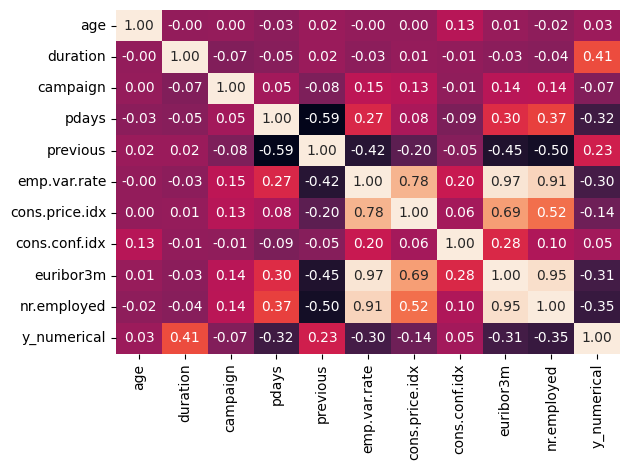

In [105]:
corr_y = df[num_variables].corr(numeric_only=True)

sns.heatmap(data=corr_y, annot=True, fmt=".2f", cbar=False)

plt.tight_layout()
plt.show()



> Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
 >
 > `nr.employed, euribor3m`
 > Estas las borramos por su alta correlacion con la variable emp.var.rate que es mayor que 90.

In [106]:
df.drop(["nr.employed", "euribor3m"],
              axis=1, inplace=True)
num_variables = df.select_dtypes(include=['int64','float64']).columns.tolist()


### Análisis categórico-categórico

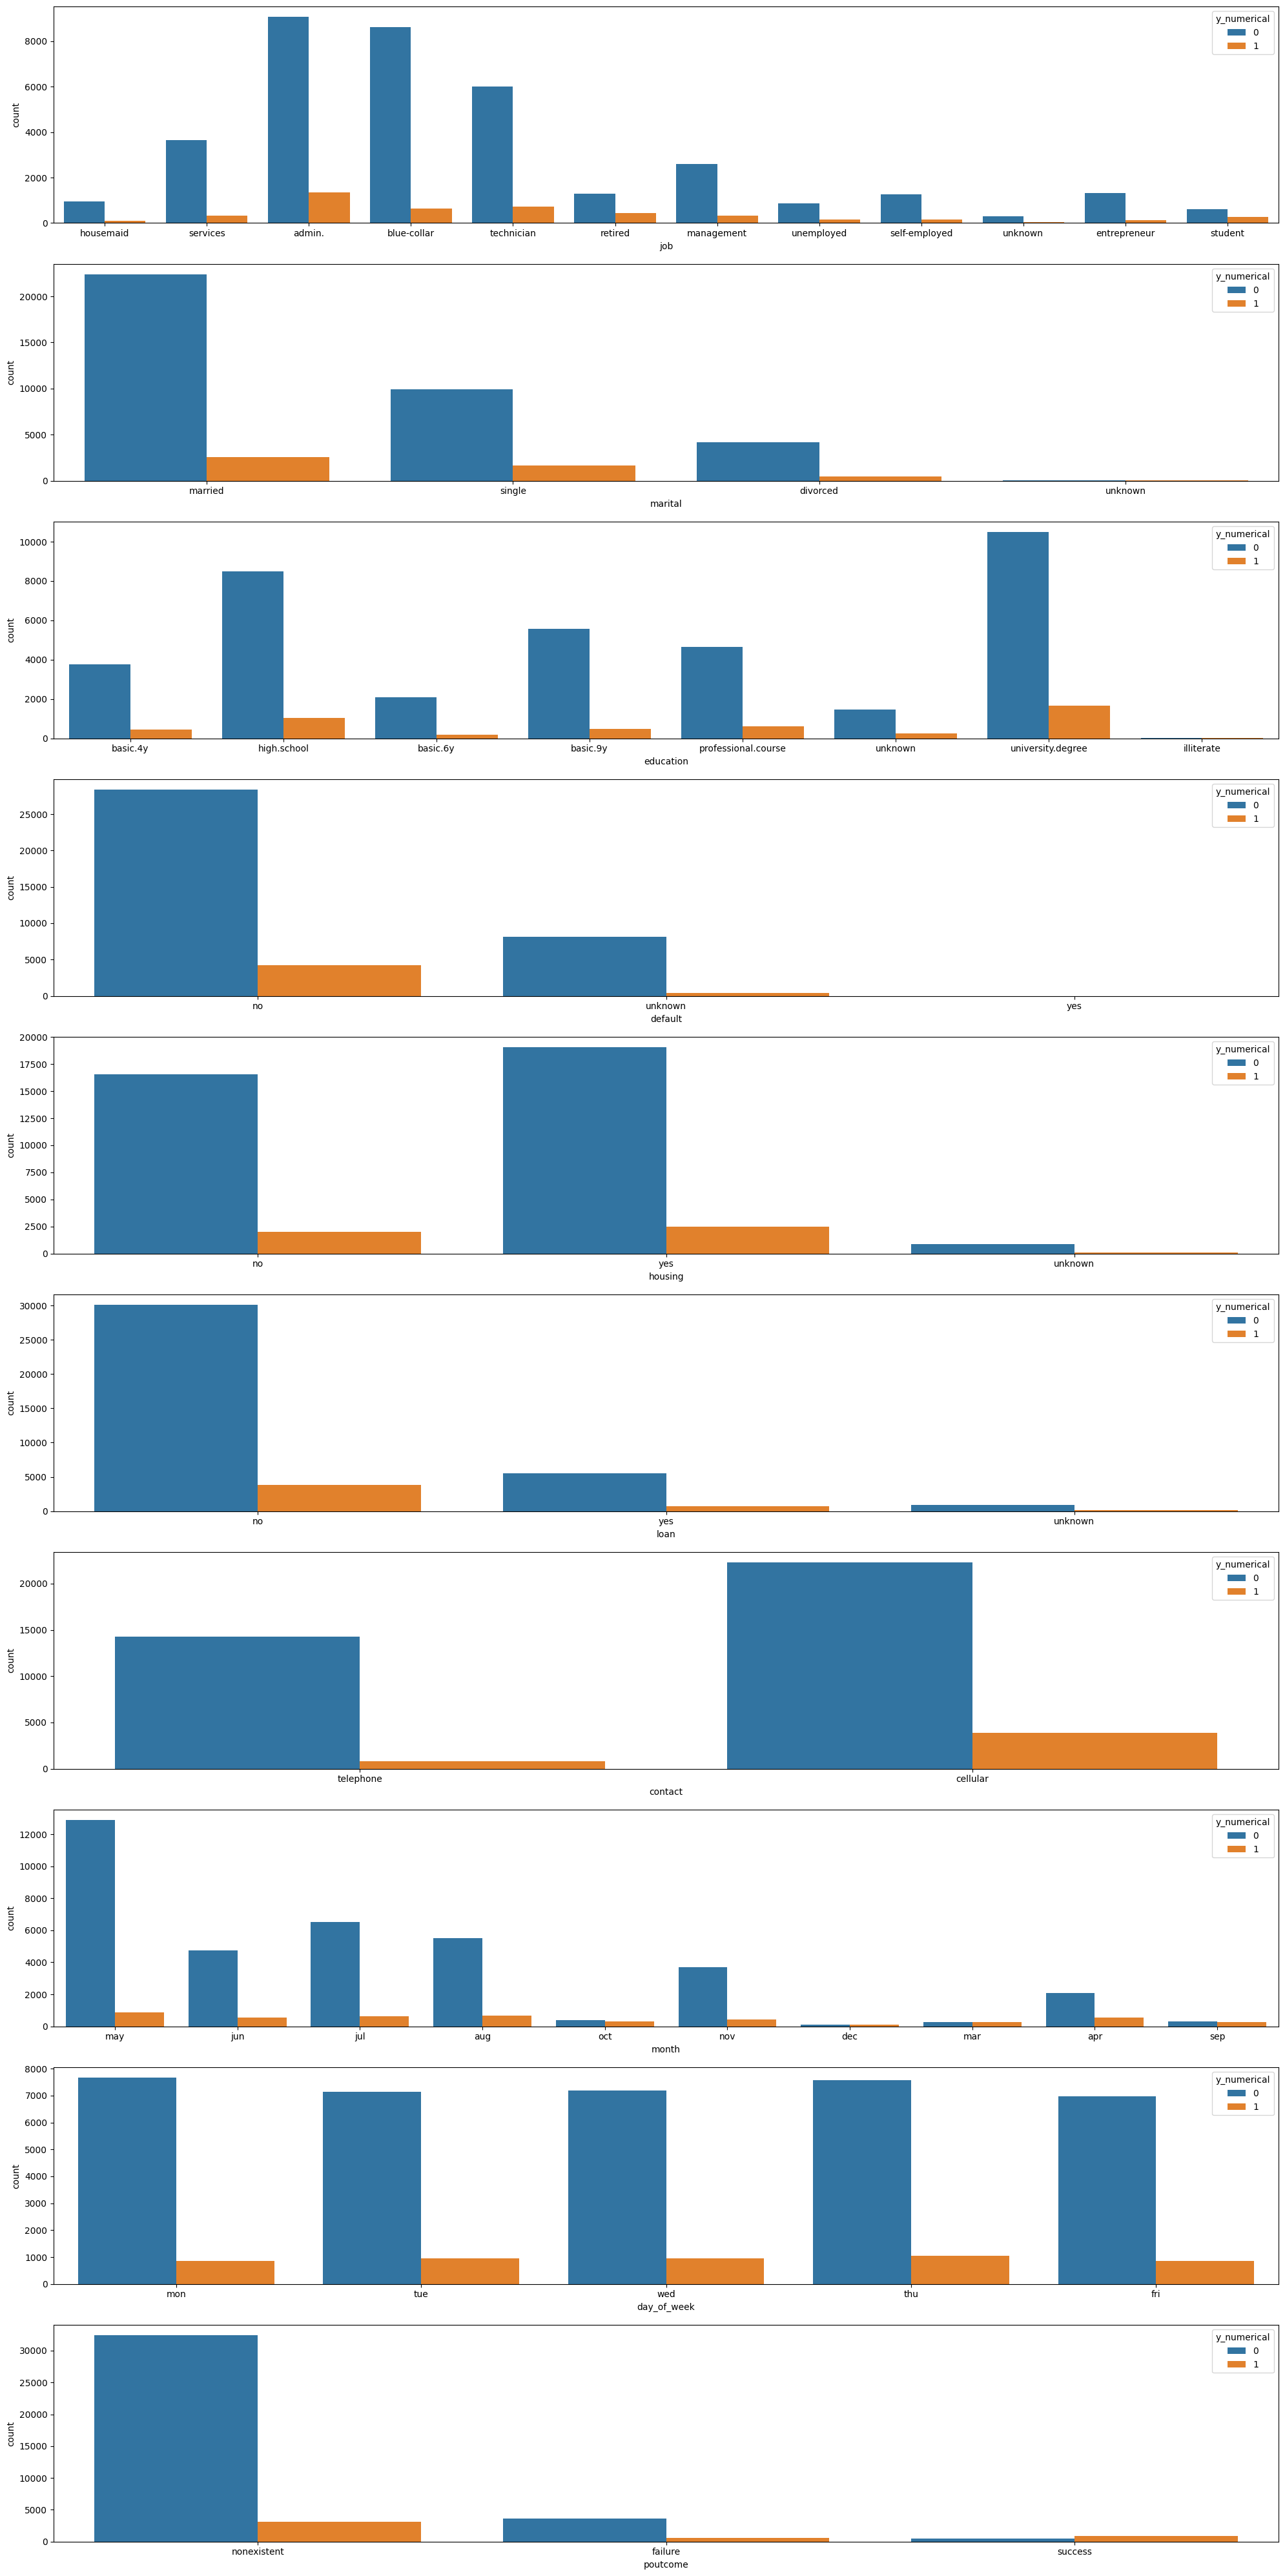

In [107]:
fig, axis = plt.subplots(len(categorical_variables), 1, figsize=(20, 4*len(categorical_variables)))

row = 0
for var in categorical_variables:
    sns.countplot(ax=axis[row], data=df, x=var, hue="y_numerical")
    row += 1

plt.tight_layout()
plt.show()


## Observaciones

> Todos parecen tener una relacion con el target, excepto los dias de la semana. Por ende tomamos la decision de eliminar esa variable.

In [108]:
df.drop(["day_of_week"],
              axis=1, inplace=True)
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

## Paso 6: Ingeniería de características

### Análisis de outliers

In [109]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
y_numerical,41176.0,0.112663,0.316184,0.000,0.000,0.000,0.000,1.000


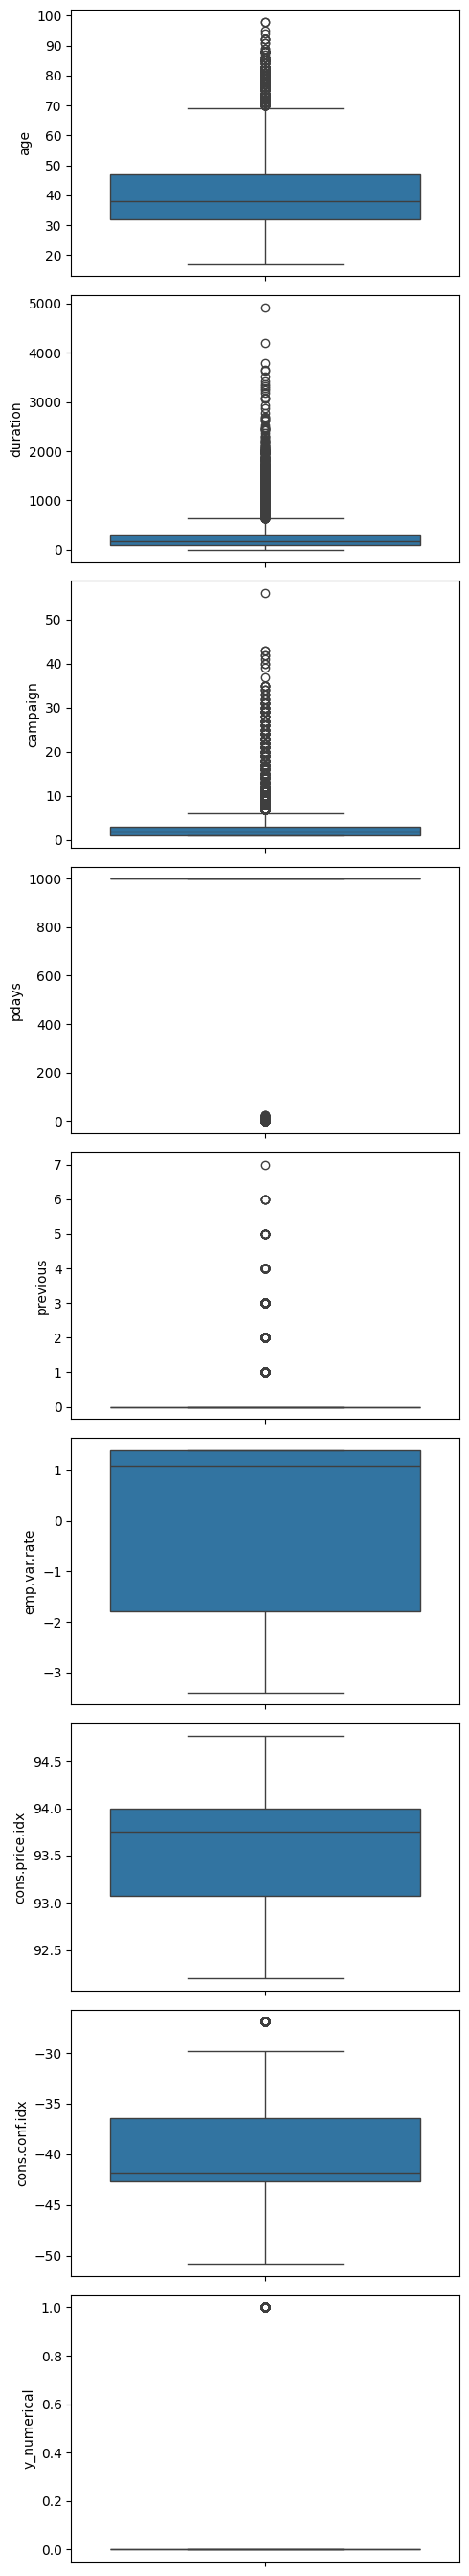

In [110]:
fig, axis = plt.subplots(len(num_variables), 1, figsize=(5, 3*len(num_variables)))

for i, var in enumerate(num_variables):
    sns.boxplot(ax=axis[i], data=df, y=var)


plt.tight_layout()
plt.show()

In [111]:
super_outliners = num_variables
q1 = df[super_outliners].quantile(0.25)
q3 = df[super_outliners].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = (q1 - 1.5 * iqr).clip(lower=0)
upper_limit = q3 + 1.5 * iqr

limits = pd.DataFrame({
    "Q1": q1.round(2),
    "Q3": q3.round(2),
    "IQR": iqr.round(2),
    "Lower": lower_limit.round(2),
    "Upper": upper_limit.round(2),
})

limits

,Q1,Q3,IQR,Lower,Upper
age,32.00,47.00,15.00,9.5,69.50
duration,102.00,319.00,217.00,0.0,644.50
campaign,1.00,3.00,2.00,0.0,6.00
pdays,999.00,999.00,0.00,999.0,999.00
previous,0.00,0.00,0.00,0.0,0.00
emp.var.rate,-1.80,1.40,3.20,0.0,6.20
cons.price.idx,93.08,93.99,0.92,91.7,95.37
cons.conf.idx,-42.70,-36.40,6.30,0.0,-26.95
y_numerical,0.00,0.00,0.00,0.0,0.00


### Observaciones

> No vemos ningun valor irreal, dejamos los outliners

### Análisis de valores faltantes

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  y_numerical     41176 non-null 

### Observaciones

> No vemos ningun valor vacio.

### Inferencia de nuevas características


### Observaciones

>No creemos necesario agregar o unificar variables.

## Paso 7: Split (dos métodos o enfoques)

In [113]:
df.shape

(41176, 18)

### Factorizamos para tener las categorias en numerico antes de crear el modelo y guardamos todo

In [114]:
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
df_copy = df.copy()
logistic_regresion_rules = {}

for var in categorical_variables:
    codes, uniques = pd.factorize(df[var])
    df_copy[var] = codes  
    logistic_regresion_rules[var] = {bat: code for code, bat in enumerate(uniques)}
with open('../models/logistic_regresion_rules.json', 'w') as file:
    json.dump(logistic_regresion_rules, file)

In [115]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_copy.drop("y_numerical", axis=1)
y = df_copy["y_numerical"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [116]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
6706,35,3,2,0,0,1,1,0,0,433,3,999,0,0,1.1,93.994,-36.4
38277,37,4,0,6,0,1,0,1,4,364,1,999,1,1,-3.4,92.431,-26.9
25853,34,2,0,6,0,1,0,1,5,174,1,999,0,0,-0.1,93.200,-42.0
20616,33,2,1,6,0,0,0,1,3,159,1,999,0,0,1.4,93.444,-36.1
27936,32,2,1,6,0,2,2,1,7,77,3,999,0,0,-1.8,92.843,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,41,8,0,6,0,1,0,0,0,150,6,999,0,0,1.1,93.994,-36.4
1726,33,4,0,4,0,0,0,0,0,205,1,999,0,0,1.1,93.994,-36.4
35653,37,2,2,6,1,1,0,1,0,442,1,999,0,0,-1.8,92.893,-46.2
25720,45,2,0,1,0,1,0,1,5,90,1,999,1,1,-0.1,93.200,-42.0


In [117]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')

In [118]:
y_test.shape

(8236,)

## Paso 8: Scaling & Encoding

### Normalización o Escalado Mínimo-Máximo

> Vamos por normalizacion. tenemos outliners que nos darian datos locos en min-max.

In [119]:
# TODO: Realizar el escalando con el dataset dividido (ahora lo estamos haciendo completo)
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler
num_variables = ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx"]
norm_features = norm_scaler.fit_transform(X_train[num_variables])

df_norm = pd.DataFrame(norm_features,
                        index=X_train.index,
                       columns=num_variables)

X_train[num_variables] = df_norm
X_test[num_variables] = norm_scaler.transform(X_test[num_variables])
df_norm.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
6706,-0.485589,0.668817,0.156841,-0.349864,0.645276,0.717949,0.889953
38277,-0.294120,0.404267,-0.567294,1.672691,-2.222286,-1.981351,2.947025
25853,-0.581323,-0.324205,-0.567294,-0.349864,-0.119407,-0.653289,-0.322638
20616,-0.677057,-0.381716,-0.567294,-0.349864,0.836447,-0.231901,0.954913
27936,-0.772791,-0.696109,0.156841,-0.349864,-1.202708,-1.269827,-2.054909


### Encoding - Codificación de variables categóricas

In [120]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
6706,-0.485589,3,2,0,0,1,1,0,0,0.668817,0.156841,999,-0.349864,0,0.645276,0.717949,0.889953
38277,-0.294120,4,0,6,0,1,0,1,4,0.404267,-0.567294,999,1.672691,1,-2.222286,-1.981351,2.947025
25853,-0.581323,2,0,6,0,1,0,1,5,-0.324205,-0.567294,999,-0.349864,0,-0.119407,-0.653289,-0.322638
20616,-0.677057,2,1,6,0,0,0,1,3,-0.381716,-0.567294,999,-0.349864,0,0.836447,-0.231901,0.954913
27936,-0.772791,2,1,6,0,2,2,1,7,-0.696109,0.156841,999,-0.349864,0,-1.202708,-1.269827,-2.054909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,0.088817,8,0,6,0,1,0,0,0,-0.416222,1.243044,999,-0.349864,0,0.645276,0.717949,0.889953
1726,-0.677057,4,0,4,0,0,0,0,0,-0.205349,-0.567294,999,-0.349864,0,0.645276,0.717949,0.889953
35653,-0.294120,2,2,6,1,1,0,1,0,0.703324,-0.567294,999,-0.349864,0,-1.202708,-1.183477,-1.232080
25720,0.471754,2,0,1,0,1,0,1,5,-0.646266,-0.567294,999,1.672691,1,-0.119407,-0.653289,-0.322638


## Paso 9: Creamos y entrenamos el modelo.

In [121]:
def warn(*args, **kwargs):
    pass


warnings.warn = warn

In [122]:
model = LogisticRegression(random_state=18)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [123]:
y_pred = model.predict(X_test)

In [124]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.9038368139873725

## Observacion

>Conseguimos un 0.90 de prediccion. es bastante bueno. revisamos la matríz de confusion.

## Paso 10: Matriz de confusión.

In [125]:
len(y_pred)

8236

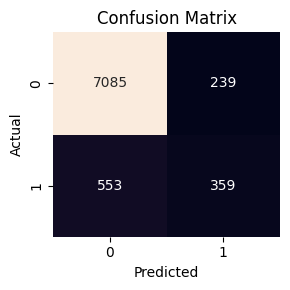

In [126]:
LogisticRegression_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
df_cm = pd.DataFrame(LogisticRegression_cm)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Observaciones

>7085 → TN (True Negative)  
>Clientes que no iban a contratar (0) y el modelo dijo 0.  
>239 → FP (False Positive)  
>Clientes que no iban a contratar (0) pero el modelo dijo 1.  
>553 → FN (False Negative)  
>Clientes que sí iban a contratar (1) pero el modelo dijo 0.  
>359 → TP (True Positive)  
>Clientes que sí iban a contratar (1) y el modelo dijo 1.  


## Paso 11: Hyperparametros

In [133]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1', 'l2', 'elasticnet', None],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Inicializamos la cuadrícula
grid = GridSearchCV(model,
                    hyperparams,
                    scoring="accuracy",
                    cv=5)
grid

,estimator,LogisticRegre...ndom_state=18)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [ ]:
grid.fit(X_train, y_train)

grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [135]:
grid.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [136]:
best_model_grid = grid.best_estimator_

y_pred_grid = best_model_grid.predict(X_train)

grid_accuracy = accuracy_score(y_train, y_pred_grid)

model_accuracy, grid_accuracy

(0.9038368139873725, 0.9109289617486339)

In [137]:
grid_accuracy - model_accuracy

0.007092147761261436

### Observamos que hay una pequeña mejora

In [138]:
hyperparams = {'C': np.logspace(-4, 4, 20),
               'penalty': ['l1', 'l2', 'elasticnet', None],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model,
                                   hyperparams,
                                   n_iter=100,
                                   scoring="accuracy",
                                   cv=5,
                                   random_state=18)
random_search

,estimator,LogisticRegre...ndom_state=18)
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,n_iter,100
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,18
,error_score,nan


In [139]:
random_search.fit(X_train, y_train)

random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(3792.690190732246)}

In [140]:
model_random_search = LogisticRegression(penalty="l1",
                                         C=3792.690190732246,
                                         solver="liblinear")

model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9062651772705197

## Observaciones

> Estos valores son ligeramente inferiores a los de la primera hiperparametrización, por ende concluimos que llegamos al maximo local y concluimos esta practica.